The AlexNet CNN architecture is one of the popular architectures of Convolutional Neural Networks. It was the first CNN architecture to stack convolutional layers directly on top of one another. This notbook will demonstrate how it can be implemented with python

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

In [2]:
model = keras.Sequential()
#layer 1
model.add(layers.Conv2D(filters= 96, kernel_size= (11,11), strides= (4,4), activation= "relu", input_shape= (227, 227, 3)))
model.add(layers.BatchNormalization())

# layer 2
model.add(layers.MaxPool2D(pool_size= (3,3), strides= (2, 2)))
model.add(layers.Conv2D(filters= 256, kernel_size= (5,5), strides= (1,1), activation= "relu", padding= "same"))
model.add(layers.BatchNormalization())

# layer 3
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.BatchNormalization())

# layer 4
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.BatchNormalization())

# layer 5
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation= "relu"))
model.add(layers.Dropout(0.5))
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


visualize the CNN

In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 16.1 MB/s eta 0:00:00


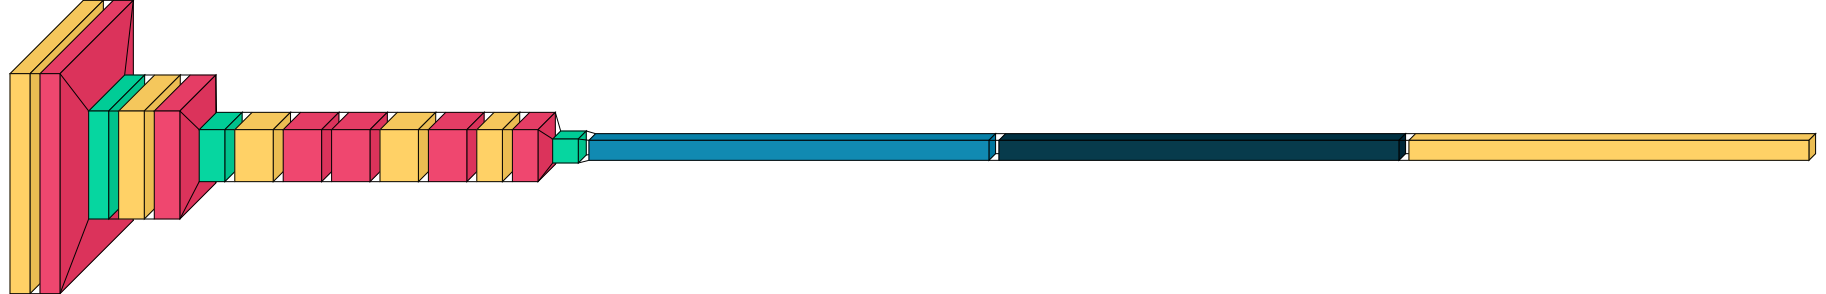

In [5]:
import visualkeras
visualkeras.layered_view(model)